In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
dis = pd.read_csv('Heart.csv')
dis.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [3]:
dis.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
dis.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
dis["num"].replace([1,2,3,4],[1,1,1,1],inplace = True)

replaced 1,2,3,4 with 1 since we are finding out only whether person has disease or not and 1 signifies yes

In [7]:
dis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [8]:
di = dis.corr()

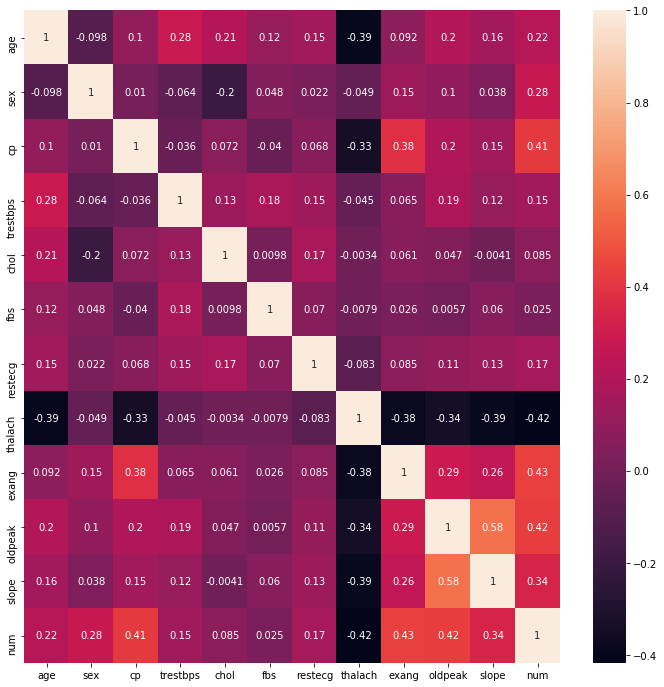

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(di,annot=True)
plt.show()

In [10]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [11]:
corr_features = correlation(dis,0.85)
len(set(corr_features))

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DF8EF2148>,
      dtype=object)

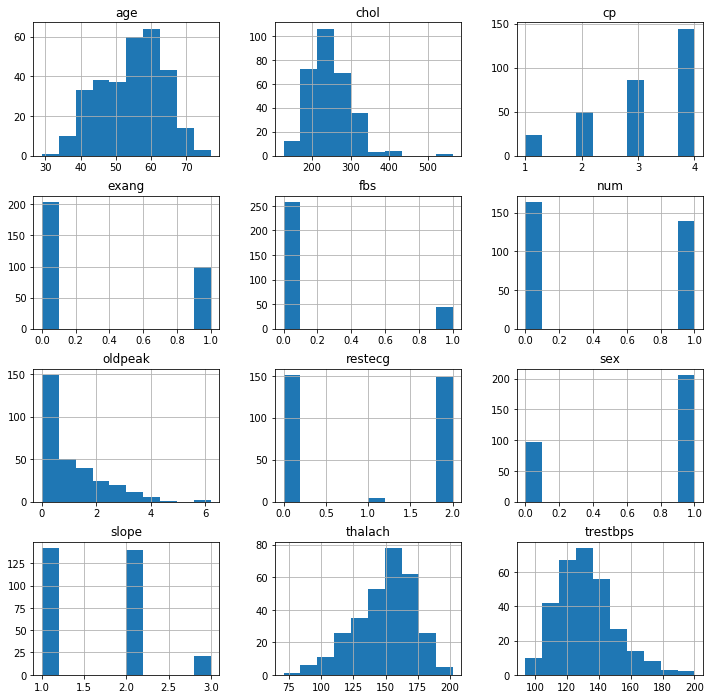

In [12]:
dis.hist(figsize=(12,12))

In [13]:
dis.skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
num         0.166406
dtype: float64

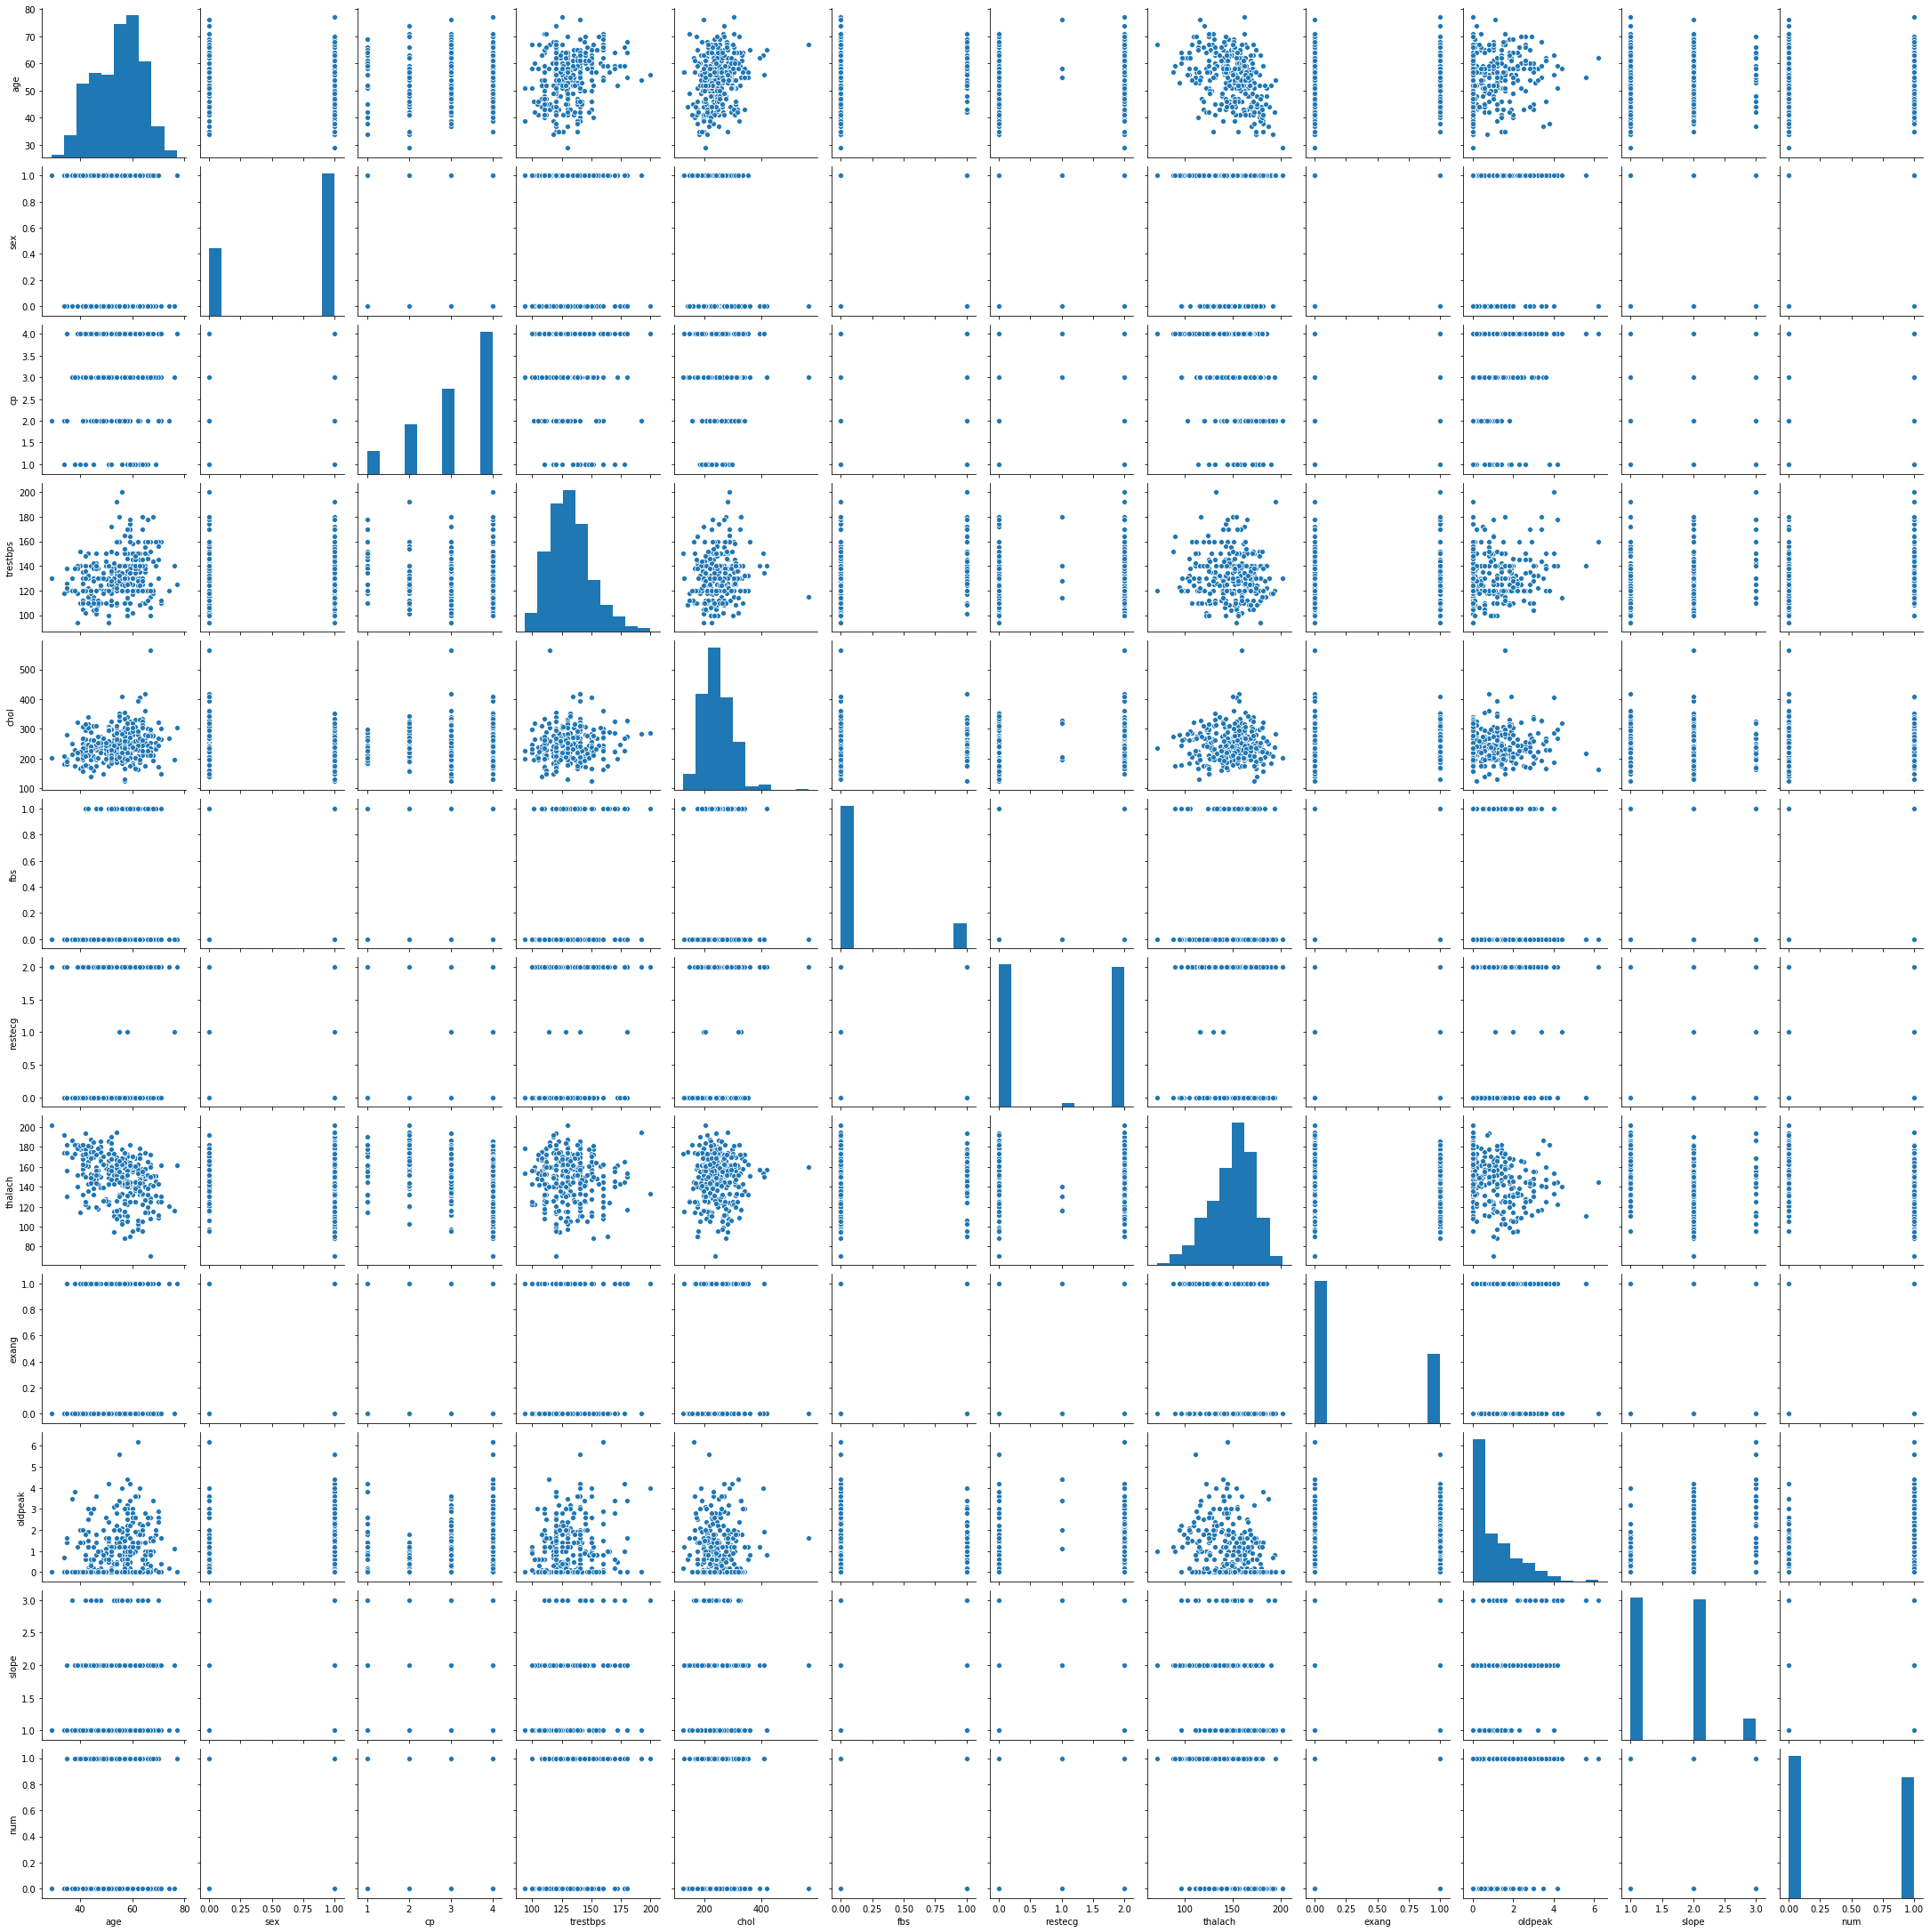

In [14]:
sns.pairplot(dis)

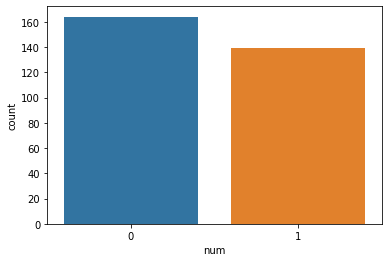

In [15]:
sns.countplot(x ="num", data=dis)

In [16]:
dis.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

age            AxesSubplot(0.125,0.749828;0.133621x0.130172)
sex         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
cp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
trestbps    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chol        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
fbs            AxesSubplot(0.125,0.593621;0.133621x0.130172)
restecg     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
thalach      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
exang       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
oldpeak     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
slope          AxesSubplot(0.125,0.437414;0.133621x0.130172)
num         AxesSubplot(0.285345,0.437414;0.133621x0.130172)
dtype: object

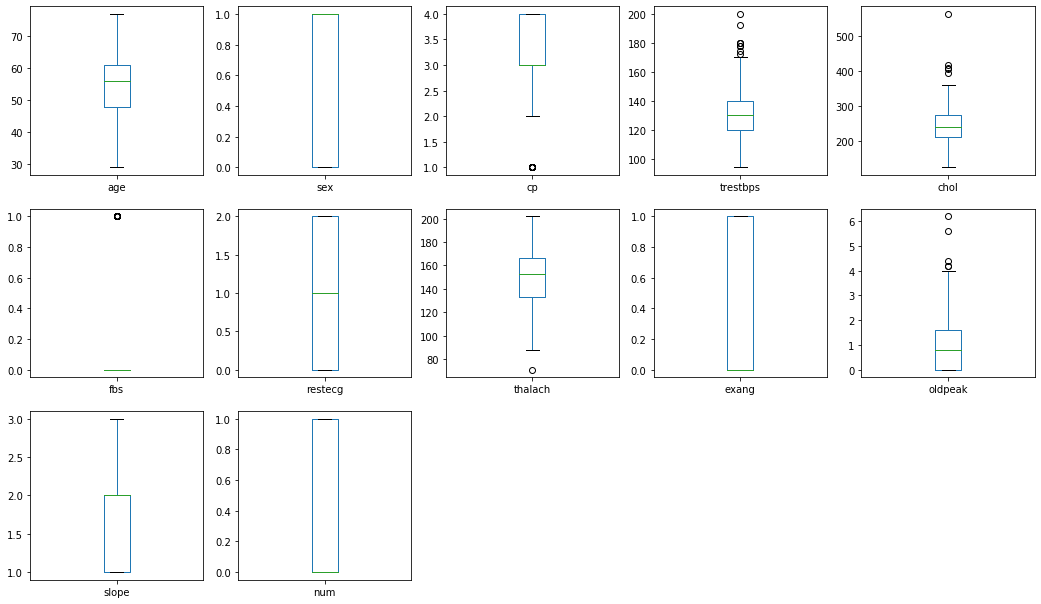

In [17]:
dis.plot(kind="box",subplots=True,layout=(5,5),figsize=(18,18))

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dis["ca"]   = le.fit_transform(dis["ca"].astype(str))
dis["thal"]   = le.fit_transform(dis["thal"].astype(str))

In [19]:
dis.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca            int32
thal          int32
num           int64
dtype: object

In [20]:
dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3,0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2,2,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0,0,0


In [21]:
dis.skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.300488
thal        0.345446
num         0.166406
dtype: float64

In [22]:
from scipy.stats import zscore
z = np.abs(zscore(dis))
z
print(dis.shape)
disease =dis.loc[(z<3).all(axis=1)]
print(disease.shape)

(303, 14)
(290, 14)


In [23]:
dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    int32  
 12  thal      303 non-null    int32  
 13  num       303 non-null    int64  
dtypes: float64(11), int32(2), int64(1)
memory usage: 30.9 KB


In [24]:
dis.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.716172,0.851485,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.005927,0.970282,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,3.000000,1.000000


age            AxesSubplot(0.125,0.749828;0.133621x0.130172)
sex         AxesSubplot(0.285345,0.749828;0.133621x0.130172)
cp           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
trestbps    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
chol        AxesSubplot(0.766379,0.749828;0.133621x0.130172)
fbs            AxesSubplot(0.125,0.593621;0.133621x0.130172)
restecg     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
thalach      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
exang       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
oldpeak     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
slope          AxesSubplot(0.125,0.437414;0.133621x0.130172)
ca          AxesSubplot(0.285345,0.437414;0.133621x0.130172)
thal         AxesSubplot(0.44569,0.437414;0.133621x0.130172)
num         AxesSubplot(0.606034,0.437414;0.133621x0.130172)
dtype: object

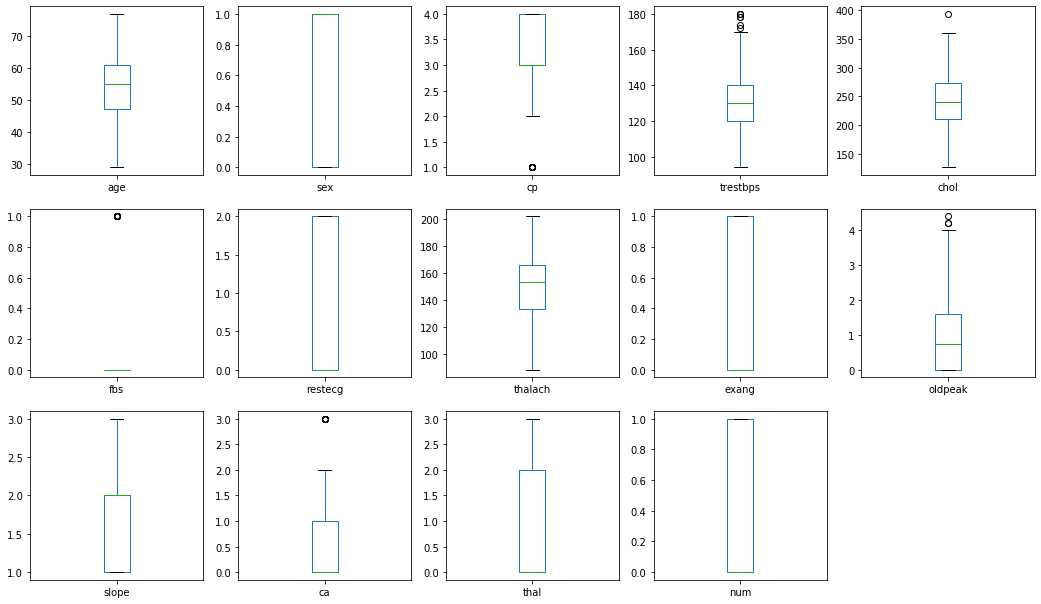

In [25]:
disease.plot(kind="box",subplots=True,layout=(5,5),figsize=(18,18))

In [26]:
x = disease.drop(["num"],axis=1)
y = disease["num"]
df_x = x = disease.drop(["num"],axis=1)

In [27]:
x.shape

(290, 13)

In [28]:
y.shape

(290,)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=df_x.columns)

In [30]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.958056,0.676230,-2.223851,0.820255,-0.250307,2.429972,1.028026,0.011341,-0.697982,1.209626,2.334676,-0.707865,0.178891
1,1.400646,0.676230,0.881688,1.705202,0.906054,-0.411527,1.028026,-1.855322,1.432701,0.466424,0.683320,2.550562,-0.858678
2,1.400646,0.676230,0.881688,-0.654658,-0.337579,-0.411527,1.028026,-0.921990,1.432701,1.488327,0.683320,1.464419,1.216460
3,-1.918782,0.676230,-0.153492,-0.064693,0.120602,-0.411527,-0.986349,1.655782,-0.697982,2.324430,2.334676,-0.707865,-0.858678
4,-1.476192,-1.478788,-1.188672,-0.064693,-0.883032,-0.411527,1.028026,0.989117,-0.697982,0.373523,-0.968037,-0.707865,-0.858678


In [31]:
x.skew()

age        -0.186325
sex        -0.806737
cp         -0.831791
trestbps    0.527410
chol        0.249827
fbs         2.028954
restecg     0.041601
thalach    -0.473920
exang       0.738544
oldpeak     0.994311
slope       0.508254
ca          1.226241
thal        0.398096
dtype: float64

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
g = pt.fit_transform(x)  
x = pd.DataFrame(g,columns=df_x.columns)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.963119,0.676230,-1.714594,0.863078,-0.200573,2.429972,1.027495,-0.108818,-0.697982,1.240874,1.960743,-0.804648,0.469073
1,1.459361,0.676230,0.989306,1.572928,0.916723,-0.411527,1.027495,-1.666061,1.432701,0.754431,0.775039,1.709786,-0.874944
2,1.459361,0.676230,0.989306,-0.619870,-0.291880,-0.411527,1.027495,-0.954329,1.432701,1.386253,0.775039,1.437191,1.202674
3,-1.812147,0.676230,-0.460450,0.037389,0.175641,-0.411527,-0.986839,1.932726,-0.697982,1.749436,1.960743,-0.804648,-0.874944
4,-1.426773,-1.478788,-1.215466,0.037389,-0.882108,-0.411527,1.027495,1.029991,-0.697982,0.678931,-1.008323,-0.804648,-0.874944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.249739,-1.478788,0.989306,0.604842,-0.021009,-0.411527,-0.986839,-1.167701,1.432701,-0.761430,0.775039,-0.804648,1.202674
286,-1.031366,0.676230,-1.714594,-1.351739,0.471268,-0.411527,-0.986839,-0.843919,-0.697982,0.513332,0.775039,-0.804648,1.202674
287,1.585585,0.676230,0.989306,0.812486,-1.151005,2.429972,-0.986839,-0.494508,-0.697982,1.713354,0.775039,1.437191,1.202674
288,0.249739,0.676230,0.989306,0.037389,-2.746378,-0.411527,-0.986839,-1.439019,1.432701,0.513332,0.775039,0.899827,1.202674


In [33]:
x.skew()

age         0.013336
sex        -0.806737
cp         -0.268564
trestbps    0.007080
chol       -0.012000
fbs         2.028954
restecg     0.040063
thalach    -0.007290
exang       0.738544
oldpeak     0.242038
slope       0.196173
ca          0.528979
thal        0.315872
dtype: float64

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [36]:
parameters = {"n_neighbors": range(1,20)}
gsc = GridSearchCV(knn,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 15}

In [37]:
parameters = {"n_estimators": range(1,20)}
gsc = GridSearchCV(rfc,parameters,cv=5)
gsc.fit(x,y)
gsc.best_params_

{'n_estimators': 18}

In [38]:
knn =KNeighborsClassifier(n_neighbors= 15)
svc = SVC()
dt= DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators= 17)
lr = LogisticRegression()
gnb = GaussianNB()

In [39]:
models=[]
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",svc))
models.append(("DecisionTreeClassifier",dt))
models.append(("KNeighborsClassifier",knn))
models.append(("LogisticRegression",lr))
models.append(("GaussianNB",gnb))
models.append(("RandomForestClassifier",rfc))

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


Accuracy score =  0.7916666666666666


cross_val_score=  0.8448275862068966


roc_auc_score =  0.7920104211897525


Classification_Report
               precision    recall  f1-score   support

           0       0.78      0.81      0.79        47
           1       0.81      0.78      0.79        49

    accuracy                           0.79        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.79      0.79      0.79        96



[[38  9]
 [11 38]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    m

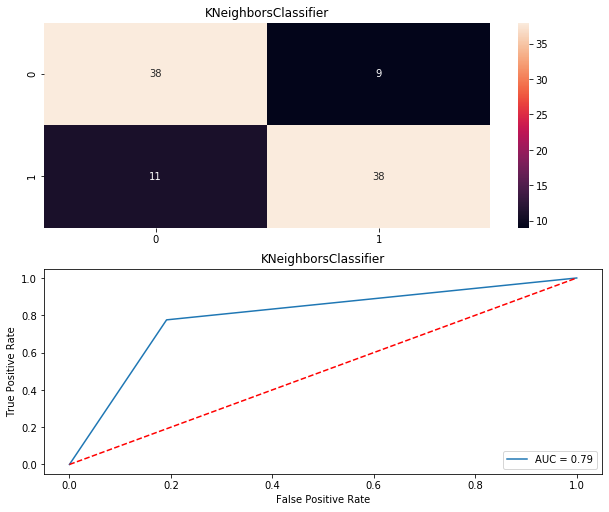

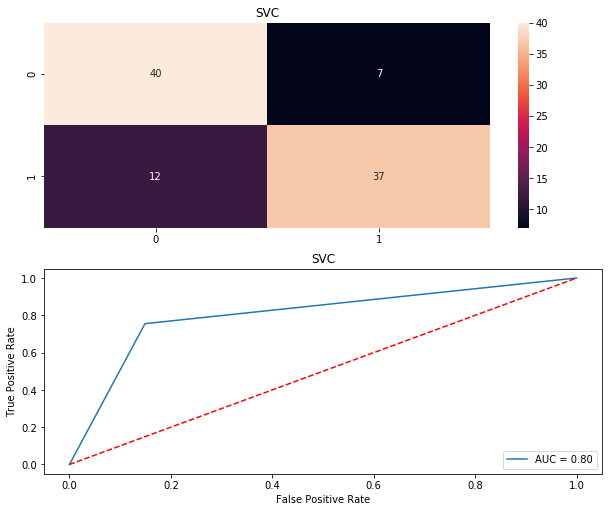

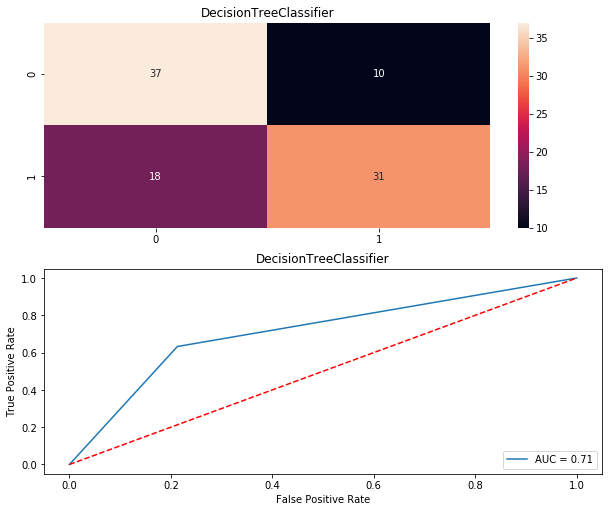

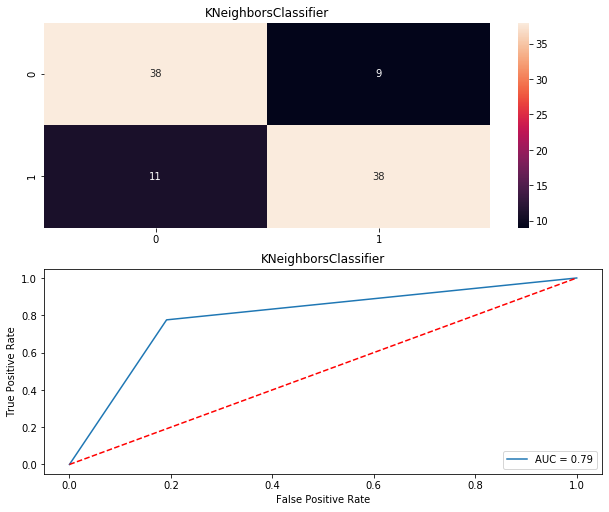

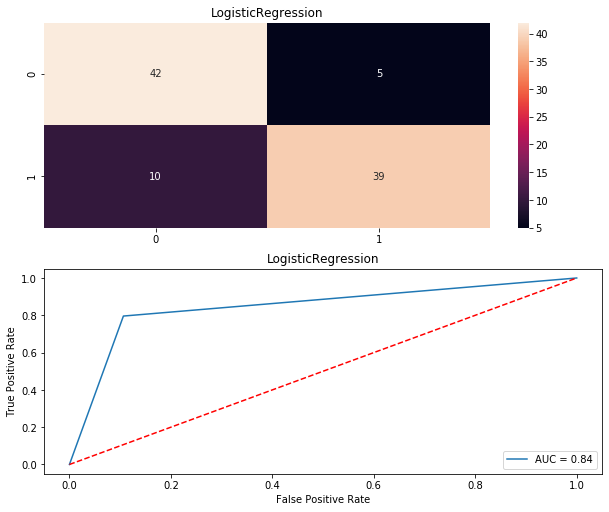

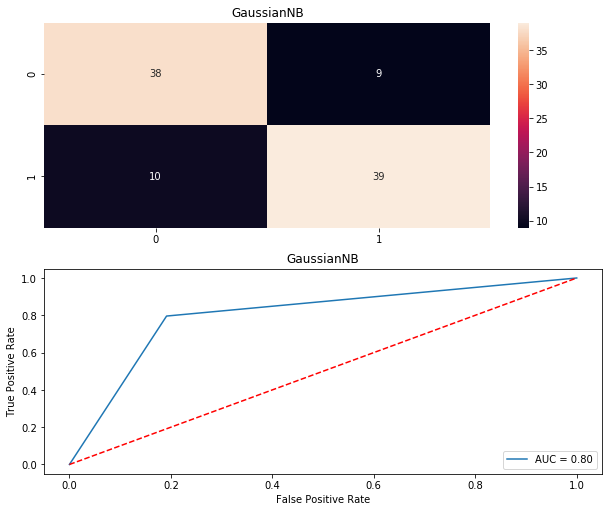

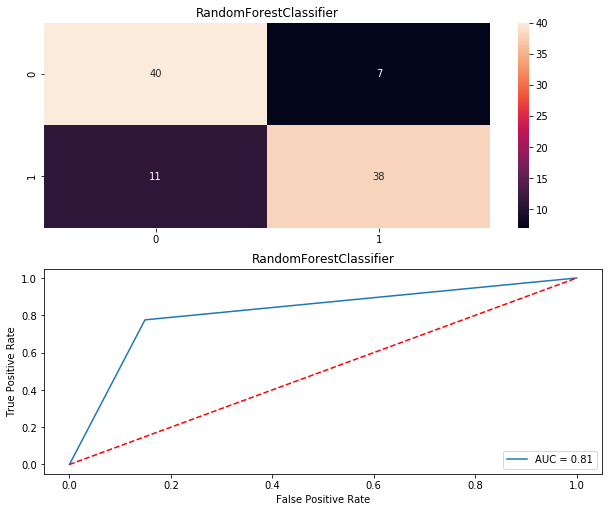

In [40]:
Model =[]
score =[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS = accuracy_score(y_test,pre)
    print("Accuracy score = ",AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score= ",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score = ",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print("Classification_Report\n",classification_report(y_test,pre))
    print('\n')
    cm = confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot = True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label = "AUC = %0.2f"%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc="lower right")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [41]:
result = pd.DataFrame({"Model": Model,"Accuracy Score":score,"Cross_val_score":cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,79.166667,84.482759,79.201042
1,SVC,80.208333,84.137931,80.308294
2,DecisionTreeClassifier,70.833333,75.862069,70.994355
3,KNeighborsClassifier,79.166667,84.482759,79.201042
4,LogisticRegression,84.375000,84.137931,84.476769
5,GaussianNB,80.208333,83.103448,80.221450
6,RandomForestClassifier,81.250000,84.482759,81.328702


In [42]:
from sklearn.externals import joblib
joblib.dump(lr,"Heart cases.obj")

['Heart cases.obj']

In [43]:
model = joblib.load("Heart cases.obj")

In [44]:
model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)